In [1]:
# Packages:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from urllib.request import urlopen
import json
import datetime
import numpy as np
import warnings
from textblob import TextBlob
import re
from wordcloud import WordCloud
import seaborn as sns
import scipy.stats as st
import scipy
from scipy import stats
import statsmodels.api as sm

In [2]:
df = pd.read_csv('../data/processed/timcook_cleaned.csv')
df.head()

,Date,Price,Price_scaled,Price_delta,Tweets,Agg_count,Agg_retweet,Agg_favorite,Subjectivity_mean,Polarity_mean,Polarity_scaled,Polarity_delta,Favorite_scaled,Retweet_scaled
0,2019-01-02,39.480000,0.030308,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2019-01-03,35.547501,0.000000,-0.030308,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2019-01-04,37.064999,0.011695,0.011695,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2019-01-07,36.982498,0.011059,-0.000636,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2019-01-08,37.687500,0.016493,0.005433,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


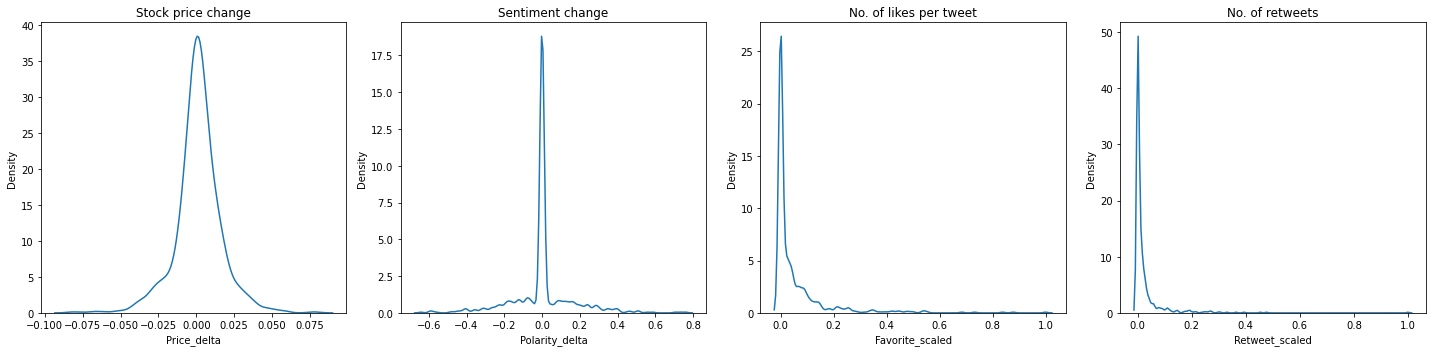

In [3]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize = (20, 5))

sns.kdeplot(ax=ax1, x=df['Price_delta'], bw_adjust=1).set_title('Stock price change')
sns.kdeplot(ax=ax2, x=df['Polarity_delta'], bw_adjust=0.27).set_title('Sentiment change')
sns.kdeplot(ax=ax3, x=df['Favorite_scaled'], bw_adjust=0.27).set_title('No. of likes per tweet')
sns.kdeplot(ax=ax4, x=df['Retweet_scaled'], bw_adjust=0.27).set_title('No. of retweets')

plt.tight_layout()

In [4]:
df.describe()

,Price,Price_scaled,Price_delta,Agg_count,Agg_retweet,Agg_favorite,Subjectivity_mean,Polarity_mean,Polarity_scaled,Polarity_delta,Favorite_scaled,Retweet_scaled
count,735.000000,735.000000,734.000000,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000
mean,93.815095,0.449067,0.001321,0.725170,970.681633,6818.458503,0.250760,0.157559,0.261502,0.002468,0.052828,0.023111
std,37.870300,0.291866,0.015294,1.048214,2672.768009,14173.229596,0.311178,0.239744,0.300773,0.159220,0.111590,0.064733
min,35.547501,0.000000,-0.081077,0.000000,0.000000,0.000000,0.000000,-0.500000,0.000000,-0.640741,0.000000,0.000000
25%,55.222502,0.151635,-0.004913,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,87.932503,0.403730,0.001291,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,127.864998,0.711489,0.008198,1.000000,779.000000,7778.000000,0.545417,0.323864,0.549242,0.000000,0.059119,0.017927
max,165.300003,1.000000,0.077609,7.000000,41209.000000,126616.000000,1.000000,1.000000,1.000000,0.761111,1.000000,1.000000


In [5]:
#from scipy.stats import boxcox

#df['transformed_return'], lam = boxcox(df["Return"])


In [6]:
numeric_df = df.filter(items=['Price_scaled','Price_delta', 'Polarity_delta', 'Favorite_scaled', 'Retweet_scaled'])
corr1 = numeric_df.corr()
corr2 = numeric_df.corr(method='spearman')

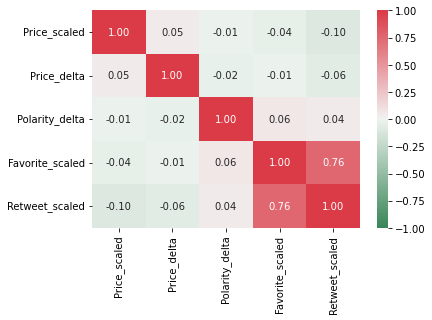

In [7]:
sns.heatmap(corr1, annot=True, cmap=sns.diverging_palette(140, 10, as_cmap=True), fmt='.2f', vmin=-1, vmax=1)
plt.show()

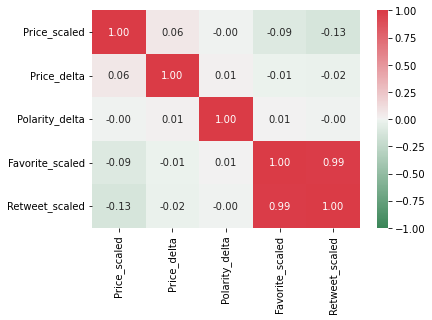

In [8]:
sns.heatmap(corr2, annot=True, cmap=sns.diverging_palette(140, 10, as_cmap=True), fmt='.2f', vmin=-1, vmax=1)
plt.show()

In [9]:
print("H0: the changes in stock market prices are similar on average compared to the changes in CEO's Twitter sentiment") 
print("H1: the changes in stock market prices are different on average compared to the changes in CEO's Twitter sentiment")

statistic = st.ttest_ind(df['Price_delta'], df['Polarity_delta'], axis=0, equal_var=False, alternative='two-sided', nan_policy='omit')[0]
pvalue = st.ttest_ind(df['Price_delta'], df['Polarity_delta'], axis=0, equal_var=False, alternative='two-sided', nan_policy='omit')[1]

print('statistic = ',statistic)
print('pvalue = ',pvalue)

if pvalue<= 0.05:
    print('We reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')
    

H0: the changes in stock market prices are similar on average compared to the changes in CEO's Twitter sentiment
H1: the changes in stock market prices are different on average compared to the changes in CEO's Twitter sentiment
statistic =  -0.19430735794127893
pvalue =  0.8459880137249417
We fail to reject the null hypothesis


C:\Users\Amalia\anaconda3\envs\dstoolkit\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


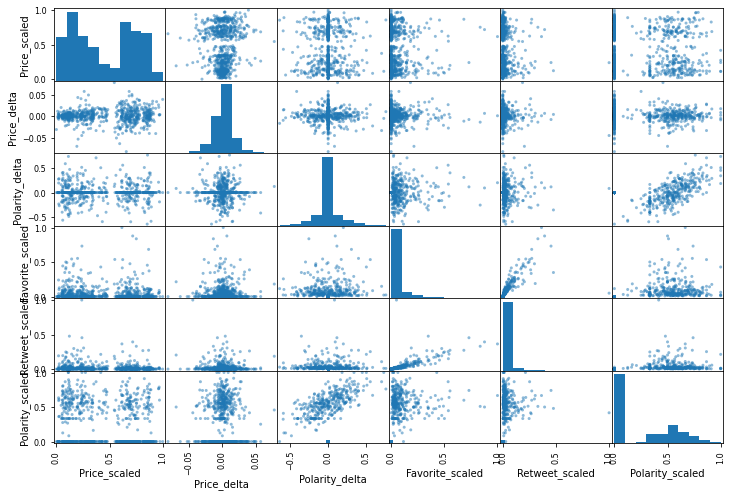

In [10]:
from pandas.plotting import scatter_matrix
df_sm = df[['Price_scaled','Price_delta', 'Polarity_delta','Favorite_scaled', 'Retweet_scaled', 'Polarity_scaled']]
df_sm.dropna(inplace=True)
scatter_matrix(df_sm, figsize=(12,8));

In [11]:
scipy.stats.shapiro(df_sm['Price_delta'])

ShapiroResult(statistic=0.9398303627967834, pvalue=1.1846495597691258e-16)

In [12]:
scipy.stats.shapiro(df_sm['Polarity_delta'])

ShapiroResult(statistic=0.8348606824874878, pvalue=7.037955840281408e-27)

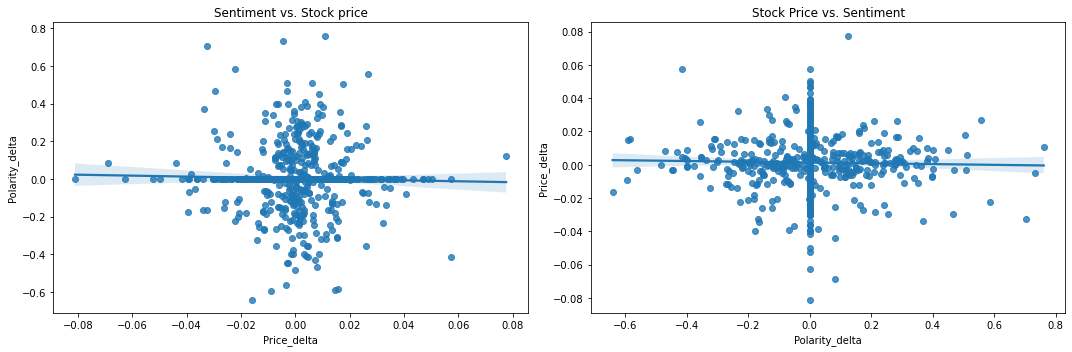

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 5))
sns.regplot(data = df_sm, x='Price_delta', y='Polarity_delta', lowess=False, ax=ax1).set(title='Sentiment vs. Stock price')
sns.regplot(data = df_sm, x='Polarity_delta', y='Price_delta', lowess=False, ax=ax2).set(title='Stock Price vs. Sentiment')

plt.tight_layout()

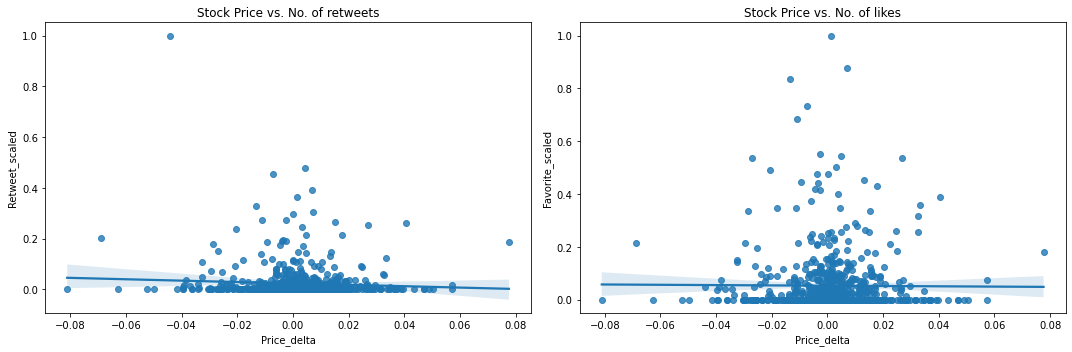

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 5))
sns.regplot(data = df_sm, x='Price_delta', y='Retweet_scaled', lowess=False, ax=ax1). set(title='Stock Price vs. No. of retweets')
sns.regplot(data = df_sm, x='Price_delta', y='Favorite_scaled', lowess=False, ax=ax2). set(title='Stock Price vs. No. of likes')

plt.tight_layout()

In [15]:
X = df_sm['Price_delta']
y = df_sm['Polarity_delta']

atm_const = sm.add_constant(X)


mod = sm.OLS(y, atm_const)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:         Polarity_delta   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.4181
Date:                Sun, 05 Dec 2021   Prob (F-statistic):              0.518
Time:                        11:50:48   Log-Likelihood:                 307.41
No. Observations:                 734   AIC:                            -610.8
Df Residuals:                     732   BIC:                            -601.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0028      0.006      0.474      

In [16]:
X = df_sm['Polarity_delta']
y = df_sm['Price_delta']

atm_const = sm.add_constant(X)


mod = sm.OLS(y, atm_const)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:            Price_delta   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.4181
Date:                Sun, 05 Dec 2021   Prob (F-statistic):              0.518
Time:                        11:50:48   Log-Likelihood:                 2027.6
No. Observations:                 734   AIC:                            -4051.
Df Residuals:                     732   BIC:                            -4042.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0013      0.001      2.

In [17]:
X = df_sm[['Favorite_scaled']]
y = df_sm['Price_delta']

atm_const = sm.add_constant(X)


mod = sm.OLS(y, atm_const)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:            Price_delta   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                   0.04492
Date:                Sun, 05 Dec 2021   Prob (F-statistic):              0.832
Time:                        11:50:48   Log-Likelihood:                 2027.4
No. Observations:                 734   AIC:                            -4051.
Df Residuals:                     732   BIC:                            -4042.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0014      0.001     

In [18]:
X = df_sm[['Retweet_scaled']]
y = df_sm['Price_delta']

atm_const = sm.add_constant(X)


mod = sm.OLS(y, atm_const)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:            Price_delta   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     3.070
Date:                Sun, 05 Dec 2021   Prob (F-statistic):             0.0802
Time:                        11:50:48   Log-Likelihood:                 2028.9
No. Observations:                 734   AIC:                            -4054.
Df Residuals:                     732   BIC:                            -4045.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0017      0.001      2.

In [19]:
X = df_sm[['Retweet_scaled', 'Polarity_delta', 'Favorite_scaled']]
y = df_sm['Price_delta']

atm_const = sm.add_constant(X)


mod = sm.OLS(y, atm_const)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:            Price_delta   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     2.131
Date:                Sun, 05 Dec 2021   Prob (F-statistic):             0.0949
Time:                        11:50:48   Log-Likelihood:                 2030.6
No. Observations:                 734   AIC:                            -4053.
Df Residuals:                     730   BIC:                            -4035.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0014      0.001     

In [20]:
X = df_sm[['Retweet_scaled', 'Polarity_delta', 'Favorite_scaled']]
y = df_sm['Price_delta']

atm_const = sm.add_constant(X)


mod = sm.OLS(y, atm_const)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:            Price_delta   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     2.131
Date:                Sun, 05 Dec 2021   Prob (F-statistic):             0.0949
Time:                        11:50:48   Log-Likelihood:                 2030.6
No. Observations:                 734   AIC:                            -4053.
Df Residuals:                     730   BIC:                            -4035.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0014      0.001     

In [21]:
X = df_sm[['Polarity_delta', 'Favorite_scaled']]
y = df_sm['Price_delta']

atm_const = sm.add_constant(X)


mod = sm.OLS(y, atm_const)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:            Price_delta   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.2237
Date:                Sun, 05 Dec 2021   Prob (F-statistic):              0.800
Time:                        11:50:48   Log-Likelihood:                 2027.6
No. Observations:                 734   AIC:                            -4049.
Df Residuals:                     731   BIC:                            -4035.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0014      0.001     